In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pd.pandas.set_option('display.max_columns',None)

In [3]:
df=pd.read_csv('D:\\Personal\\ML\\Machine_Learning\\Dataset\\ChunkRisk\\train.csv')

In [4]:
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,?,CID21329,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

In [6]:
df.shape

(36992, 25)

In [7]:
df['customer_id'].count()

36992

In [8]:
df['security_no'].count()

36992

In [9]:
df['referral_id'].count()

36992

In [10]:
df['Name'].count()

36992

In [11]:
## since all the id's are unique so we first Remove id's and name column too because it has also no use in preiction

df.drop(['customer_id', 'security_no','referral_id','Name'], axis=1, inplace=True)

In [12]:
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,32,F,City,Premium Membership,2017-08-28,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,16,306.34,12838.38,10,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,14,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,11,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,20,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,5


In [13]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


## Finding the missing values (if any)

In [14]:
df.isnull().sum()

age                                0
gender                             0
region_category                 5428
membership_category                0
joining_date                       0
joined_through_referral            0
preferred_offer_types            288
medium_of_operation                0
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                3443
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [15]:
## 1st step make the list of all the features which has missing values
features_with_nan=[features for features in df.columns if df[features].isnull().sum()>1]

## 2nd step print the feature name and the percentage of missing values

for feature in features_with_nan:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')

region_category 0.1467 % missing values
preferred_offer_types 0.0078 % missing values
points_in_wallet 0.0931 % missing values


## Numerical variables

In [16]:
## list of numerical variables
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical features: ', len(numerical_features))

Number of numerical features:  6


In [17]:
## numerical features
df[numerical_features].head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
0,18,17,300.63,53005.25,781.75,2
1,32,16,306.34,12838.38,NaN,1
2,44,14,516.16,21027.00,500.69,5
3,37,11,53.27,25239.56,567.66,5
4,31,20,113.13,24483.66,663.06,5


In [18]:

numerical_features_with_nan=[features for features in numerical_features if df[features].isnull().sum()>1]

for feature in numerical_features_with_nan:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')

points_in_wallet 0.0931 % missing values


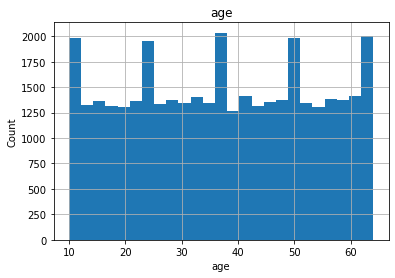

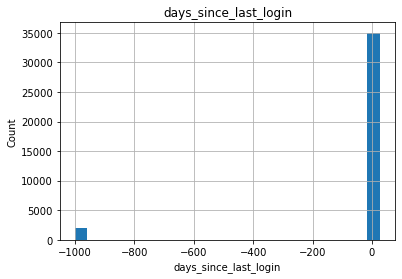

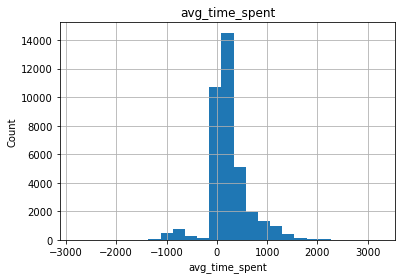

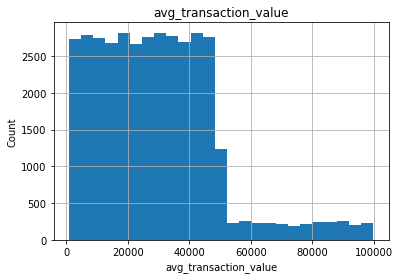

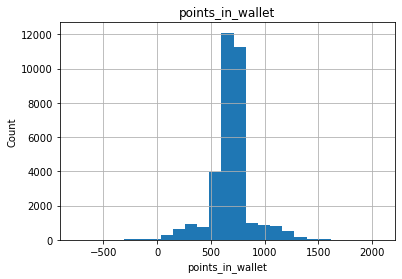

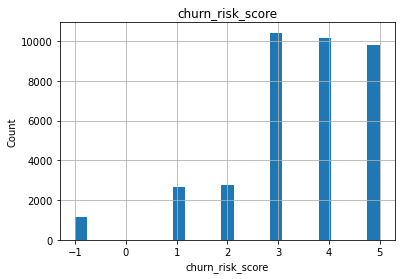

In [19]:
## now analyse the numerical feature using histogram to find the distribution
for feature in numerical_features:
    data=df.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

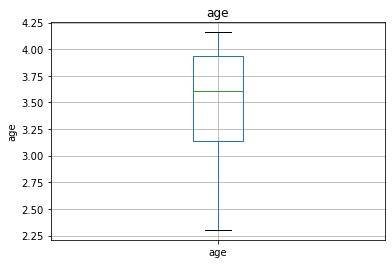

D:\Personal\ML\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


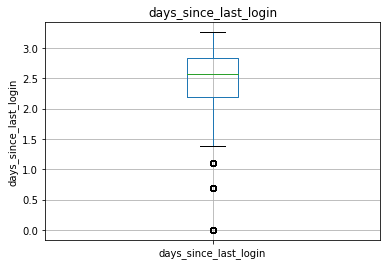

D:\Personal\ML\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


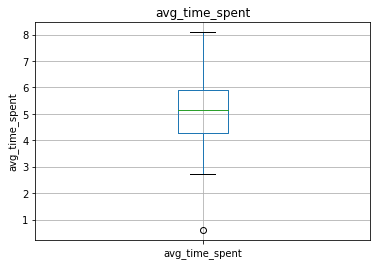

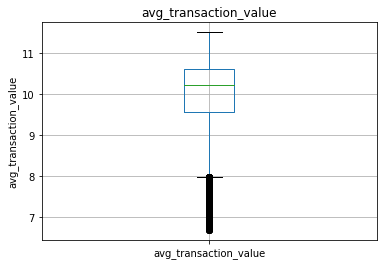

D:\Personal\ML\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


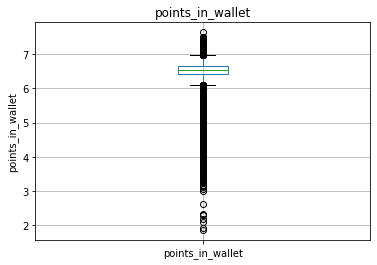

D:\Personal\ML\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


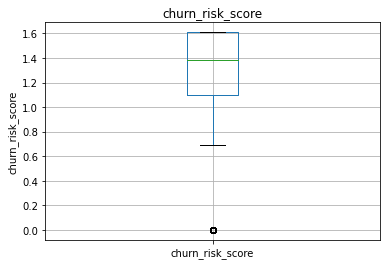

In [20]:
# check for outliers

## lets find outthe outliers
for feature in numerical_features:
    data=df.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [21]:
# replace the missing values with median because of so many outliers

for feature in numerical_features_with_nan:
    
    median_value=df[feature].median()
    #replace the nan value with median
    df[feature].fillna(median_value,inplace=True)

In [22]:
# to see if still any value is missing
df[numerical_features_with_nan].isnull().sum()

points_in_wallet    0
dtype: int64

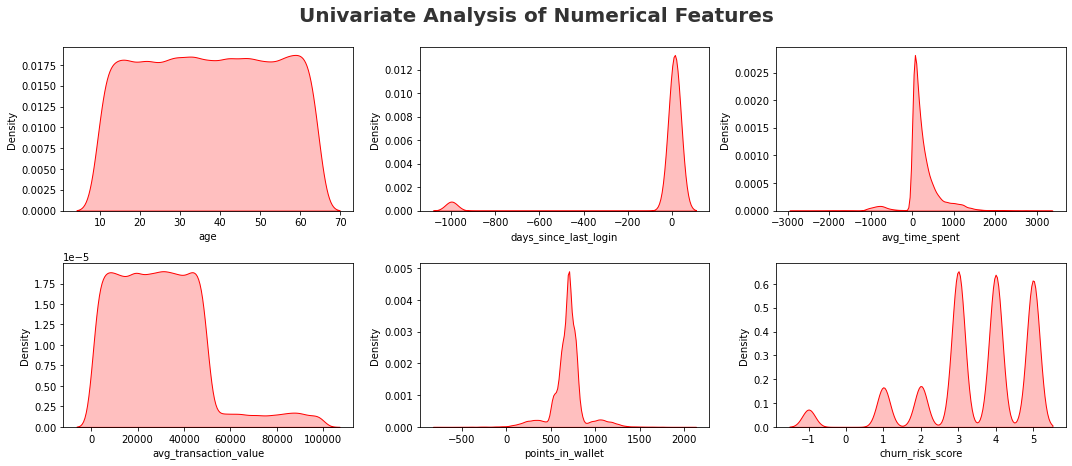

In [23]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numerical_features[i]],shade=True, color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

## Ctegorical variables

In [24]:
categorial_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorial_features

['gender',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'avg_frequency_login_days',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [25]:
df[categorial_features].head()

,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,avg_frequency_login_days,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,?,Wi-Fi,16:08:02,17,Yes,Yes,No,Not Applicable,Products always in Stock
1,F,City,Premium Membership,2017-08-28,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,12:38:13,10,Yes,No,Yes,Solved,Quality Customer Care
2,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,22:53:21,22,No,Yes,Yes,Solved in Follow-up,Poor Website
3,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,15:57:50,6,No,Yes,Yes,Unsolved,Poor Website
4,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,15:46:44,16,No,Yes,Yes,Solved,Poor Website


In [26]:

categorical_features_with_nan=[features for features in categorial_features if df[features].isnull().sum()>1]

for feature in categorical_features_with_nan:
    print(feature, np.round(df[feature].isnull().mean(), 4), '% missing values')

region_category 0.1467 % missing values
preferred_offer_types 0.0078 % missing values


In [27]:
df['gender'].unique()   

array(['F', 'M', 'Unknown'], dtype=object)

In [28]:
df['gender'].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

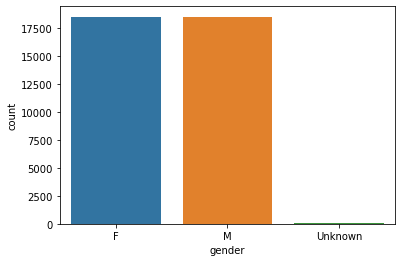

In [29]:
 sns.countplot(x=df["gender"])

Gender has some missing values

In [30]:
df['feedback'].unique()   

array(['Products always in Stock', 'Quality Customer Care',
       'Poor Website', 'No reason specified', 'Poor Product Quality',
       'Poor Customer Service', 'Too many ads', 'User Friendly Website',
       'Reasonable Price'], dtype=object)

In [31]:
df['complaint_status'].unique()   

array(['Not Applicable', 'Solved', 'Solved in Follow-up', 'Unsolved',
       'No Information Available'], dtype=object)

In [32]:
df['past_complaint'].unique()   

array(['No', 'Yes'], dtype=object)

In [33]:
df['offer_application_preference'].unique()   

array(['Yes', 'No'], dtype=object)

In [34]:
df['used_special_discount'].unique()   

array(['Yes', 'No'], dtype=object)

In [35]:
df['avg_frequency_login_days'].unique()   

array(['17', '10', '22', ..., '-9.325511142', '-8.759329713',
       '27.83992744'], dtype=object)

In [36]:
df['last_visit_time'].unique()  

array(['16:08:02', '12:38:13', '22:53:21', ..., '4:14:05', '9:50:03',
       '1:39:52'], dtype=object)

In [37]:
df['internet_option'].unique() 

array(['Wi-Fi', 'Mobile_Data', 'Fiber_Optic'], dtype=object)

In [38]:
df['region_category'].unique()

array(['Village', 'City', 'Town', nan], dtype=object)

In [39]:
df['region_category'].value_counts()

Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64

region_category has some missing values

In [40]:
df['membership_category'].unique()

array(['Platinum Membership', 'Premium Membership', 'No Membership',
       'Gold Membership', 'Silver Membership', 'Basic Membership'],
      dtype=object)

In [41]:
 df['preferred_offer_types'].unique()

array(['Gift Vouchers/Coupons', 'Credit/Debit Card Offers',
       'Without Offers', nan], dtype=object)

preferred_offer_types has nan values

In [42]:
df['medium_of_operation'].unique()

array(['?', 'Desktop', 'Smartphone', 'Both'], dtype=object)

<AxesSubplot:xlabel='medium_of_operation', ylabel='count'>

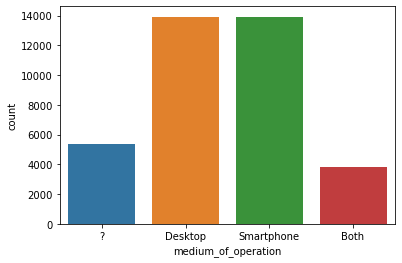

In [43]:
 sns.countplot(x=df["medium_of_operation"])

In [44]:
df['joined_through_referral'].unique()

array(['No', '?', 'Yes'], dtype=object)

<AxesSubplot:xlabel='joined_through_referral', ylabel='count'>

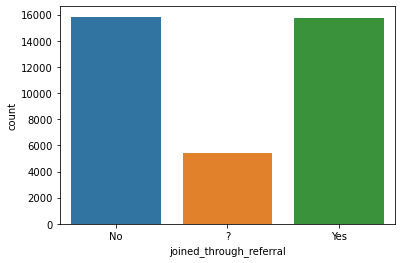

In [45]:
sns.countplot(x=df["joined_through_referral"])

joined_through_referral has missing values 

In [46]:
df['avg_frequency_login_days'].unique

<bound method Series.unique of 0           17
1           10
2           22
3            6
4           16
         ...  
36987        6
36988       28
36989    Error
36990       20
36991    Error
Name: avg_frequency_login_days, Length: 36992, dtype: object>

In [47]:
count=0
for data in df['avg_frequency_login_days']:
    
    if data=='Error':
        count+=1
    
print(count)

3522


avg_frequency_login_days has Error values in some columns so we have to deal with that too

In [48]:
# from above analysis we can see there are some date time column and some integer columns which we have to filter

## Temporal Variables

In [49]:
## list of temporal variables
datetime_feature=[feature for feature in df.columns if 'joining_date' in feature or 'last_visit_time' in feature]

datetime_feature

['joining_date', 'last_visit_time']

In [50]:
df[datetime_feature]

,joining_date,last_visit_time
0,2017-08-17,16:08:02
1,2017-08-28,12:38:13
2,2016-11-11,22:53:21
3,2016-10-29,15:57:50
4,2017-09-12,15:46:44
...,...,...
36987,2017-09-21,4:14:05
36988,2016-06-27,23:18:31
36989,2016-09-11,3:50:25
36990,2017-06-15,9:50:03


In [51]:
df["joining_date"]=pd.to_datetime(df["joining_date"])

In [52]:
df["joining_date"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 36992 entries, 0 to 36991
Series name: joining_date
Non-Null Count  Dtype         
--------------  -----         
36992 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 289.1 KB


In [53]:
df["day"]=df["joining_date"].dt.day

In [54]:
df["month"]=df["joining_date"].dt.month

In [55]:
df["year"]=df["joining_date"].dt.year

In [56]:
df["last_visit_time"]=pd.to_datetime(df["last_visit_time"])

In [57]:
df["last_visit_time"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 36992 entries, 0 to 36991
Series name: last_visit_time
Non-Null Count  Dtype         
--------------  -----         
36992 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 289.1 KB


In [58]:
df["last_visit_time"]=df["last_visit_time"].values.astype('datetime64[D]')

In [59]:
df.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,day,month,year
0,18,F,Village,Platinum Membership,2017-08-17,No,Gift Vouchers/Coupons,?,Wi-Fi,2023-07-09,17,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,17,8,2017
1,32,F,City,Premium Membership,2017-08-28,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,2023-07-09,16,306.34,12838.38,10,697.62,Yes,No,Yes,Solved,Quality Customer Care,1,28,8,2017
2,44,F,Town,No Membership,2016-11-11,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,2023-07-09,14,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,11,11,2016
3,37,M,City,No Membership,2016-10-29,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,2023-07-09,11,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,5,29,10,2016
4,31,F,City,No Membership,2017-09-12,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,2023-07-09,20,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,5,12,9,2017


In [60]:
df.drop(['joining_date','last_visit_time'], axis=1, inplace=True)

In [61]:
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,day,month,year
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,?,Wi-Fi,17,300.63,53005.25,17,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,17,8,2017
1,32,F,City,Premium Membership,?,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10,697.62,Yes,No,Yes,Solved,Quality Customer Care,1,28,8,2017
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,11,11,2016
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6,567.66,No,Yes,Yes,Unsolved,Poor Website,5,29,10,2016
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16,663.06,No,Yes,Yes,Solved,Poor Website,5,12,9,2017


In [62]:
## Replacing the unknown value in gender with male and female because unknown values are less

df['gender'].value_counts()

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64

In [63]:
df['gender']=df['gender'].str.replace('Unknown','M')

In [64]:
df['gender'].value_counts()

M    18502
F    18490
Name: gender, dtype: int64

In [65]:
## Fill nan values of regional category with keyword missing

df['region_category']=df['region_category'].fillna('Missing')

In [66]:
df['region_category'].isnull().sum()

0

In [67]:
## fill the medium_of_operation issing values

df['medium_of_operation'].unique()

array(['?', 'Desktop', 'Smartphone', 'Both'], dtype=object)

In [68]:
df['medium_of_operation']=df['medium_of_operation'].str.replace('?','Missing')

C:\Users\LIFI\AppData\Local\Temp\ipykernel_10752\3035055941.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['medium_of_operation']=df['medium_of_operation'].str.replace('?','Missing')


In [69]:
df['medium_of_operation'].unique()

array(['Missing', 'Desktop', 'Smartphone', 'Both'], dtype=object)

In [70]:
## Fill nan values of regional category with keyowrd missing

df['preferred_offer_types'].unique()
    


array(['Gift Vouchers/Coupons', 'Credit/Debit Card Offers',
       'Without Offers', nan], dtype=object)

In [71]:
df['preferred_offer_types']=df['preferred_offer_types'].fillna('Missing')

In [72]:
df['preferred_offer_types'].unique()

array(['Gift Vouchers/Coupons', 'Credit/Debit Card Offers',
       'Without Offers', 'Missing'], dtype=object)

In [73]:
## avg_frequency_login_days has missing values 
## convert the error cell into median of the column
df['avg_frequency_login_days'].value_counts()

Error           3522
13              1394
19              1365
8               1361
14              1355
                ... 
28.1915704         1
41.73357295        1
-11.51593981       1
45.71683637        1
27.83992744        1
Name: avg_frequency_login_days, Length: 1654, dtype: int64

In [74]:

#replace the error value with nan values first
df=df.replace('Error',np.nan)


In [75]:
df['avg_frequency_login_days'].value_counts()

13              1394
19              1365
8               1361
14              1355
17              1349
                ... 
28.1915704         1
41.73357295        1
-11.51593981       1
45.71683637        1
27.83992744        1
Name: avg_frequency_login_days, Length: 1653, dtype: int64

In [76]:
# now replace the nan values with the median

median_value=df['avg_frequency_login_days'].median()
df['avg_frequency_login_days'].fillna(median_value,inplace=True)

In [77]:
df['avg_frequency_login_days'].value_counts()

16.0            3522
13              1394
19              1365
8               1361
14              1355
                ... 
28.1915704         1
41.73357295        1
-11.51593981       1
45.71683637        1
27.83992744        1
Name: avg_frequency_login_days, Length: 1654, dtype: int64

In [78]:
df['joined_through_referral'].unique()

array(['No', '?', 'Yes'], dtype=object)

In [79]:
df['joined_through_referral'].value_counts()

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64

In [80]:
df['joined_through_referral']=df['joined_through_referral'].str.replace('?','Missing')

C:\Users\LIFI\AppData\Local\Temp\ipykernel_10752\1671785007.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['joined_through_referral']=df['joined_through_referral'].str.replace('?','Missing')


In [81]:
df['joined_through_referral'].value_counts()

No         15839
Yes        15715
Missing     5438
Name: joined_through_referral, dtype: int64

In [82]:
## convert the avg_frequency_login_days column to float

df['avg_frequency_login_days']=df['avg_frequency_login_days'].astype("float")

In [83]:
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,day,month,year
0,18,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Missing,Wi-Fi,17,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2,17,8,2017
1,32,F,City,Premium Membership,Missing,Gift Vouchers/Coupons,Desktop,Mobile_Data,16,306.34,12838.38,10.0,697.62,Yes,No,Yes,Solved,Quality Customer Care,1,28,8,2017
2,44,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,14,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5,11,11,2016
3,37,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,11,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5,29,10,2016
4,31,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,20,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5,12,9,2017


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           36992 non-null  int64  
 1   gender                        36992 non-null  object 
 2   region_category               36992 non-null  object 
 3   membership_category           36992 non-null  object 
 4   joined_through_referral       36992 non-null  object 
 5   preferred_offer_types         36992 non-null  object 
 6   medium_of_operation           36992 non-null  object 
 7   internet_option               36992 non-null  object 
 8   days_since_last_login         36992 non-null  int64  
 9   avg_time_spent                36992 non-null  float64
 10  avg_transaction_value         36992 non-null  float64
 11  avg_frequency_login_days      36992 non-null  float64
 12  points_in_wallet              36992 non-null  float64
 13  u

In [85]:
# sns.pairplot(df,hue='churn_risk_score',height=4)

In [86]:
categorial_features=[feature for feature in df.columns if df[feature].dtypes=='O']
categorial_features

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [87]:
df[categorial_features]

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,F,Village,Platinum Membership,No,Gift Vouchers/Coupons,Missing,Wi-Fi,Yes,Yes,No,Not Applicable,Products always in Stock
1,F,City,Premium Membership,Missing,Gift Vouchers/Coupons,Desktop,Mobile_Data,Yes,No,Yes,Solved,Quality Customer Care
2,F,Town,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,No,Yes,Yes,Solved in Follow-up,Poor Website
3,M,City,No Membership,Yes,Gift Vouchers/Coupons,Desktop,Mobile_Data,No,Yes,Yes,Unsolved,Poor Website
4,F,City,No Membership,No,Credit/Debit Card Offers,Smartphone,Mobile_Data,No,Yes,Yes,Solved,Poor Website
...,...,...,...,...,...,...,...,...,...,...,...,...
36987,F,Missing,Basic Membership,No,Credit/Debit Card Offers,Desktop,Wi-Fi,No,Yes,Yes,No Information Available,No reason specified
36988,F,Town,Basic Membership,No,Without Offers,Smartphone,Wi-Fi,Yes,No,No,Not Applicable,Poor Customer Service
36989,F,Missing,Basic Membership,Yes,Gift Vouchers/Coupons,Desktop,Wi-Fi,No,Yes,Yes,Unsolved,Poor Website
36990,M,Village,Platinum Membership,No,Gift Vouchers/Coupons,Smartphone,Mobile_Data,Yes,Yes,No,Not Applicable,No reason specified


In [88]:
# Converting categorical feature to numerical one using label encoder

In [89]:
from sklearn.preprocessing import LabelEncoder

In [90]:
categorial_features

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [91]:
for feature in categorial_features:
    le = LabelEncoder()
    encoded = le.fit_transform(df[feature])
    
    df.drop(feature, axis=1, inplace=True)
    # Appending the array to our dataFrame
    df[feature] = encoded

In [92]:
df.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,day,month,year,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,18,17,300.63,53005.25,17.0,781.75,2,17,8,2017,0,3,3,1,1,2,2,1,1,0,1,4
1,32,16,306.34,12838.38,10.0,697.62,1,28,8,2017,0,0,4,0,1,1,1,1,0,1,2,5
2,44,14,516.16,21027.00,22.0,500.69,5,11,11,2016,0,2,2,2,1,1,2,0,1,1,3,3
3,37,11,53.27,25239.56,6.0,567.66,5,29,10,2016,1,0,2,2,1,1,1,0,1,1,4,3
4,31,20,113.13,24483.66,16.0,663.06,5,12,9,2017,0,0,2,1,0,3,1,0,1,1,2,3


In [93]:
df.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,day,month,year,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,18,17,300.63,53005.25,17.0,781.75,2,17,8,2017,0,3,3,1,1,2,2,1,1,0,1,4
1,32,16,306.34,12838.38,10.0,697.62,1,28,8,2017,0,0,4,0,1,1,1,1,0,1,2,5
2,44,14,516.16,21027.00,22.0,500.69,5,11,11,2016,0,2,2,2,1,1,2,0,1,1,3,3
3,37,11,53.27,25239.56,6.0,567.66,5,29,10,2016,1,0,2,2,1,1,1,0,1,1,4,3
4,31,20,113.13,24483.66,16.0,663.06,5,12,9,2017,0,0,2,1,0,3,1,0,1,1,2,3


## Feature Scaling

In [94]:

scaling_feature=[feature for feature in df.columns if feature not in ['churn_risk_score']]
len(scaling_feature)

21

In [95]:
X=df[scaling_feature]

In [96]:
X.head()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,day,month,year,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,18,17,300.63,53005.25,17.0,781.75,17,8,2017,0,3,3,1,1,2,2,1,1,0,1,4
1,32,16,306.34,12838.38,10.0,697.62,28,8,2017,0,0,4,0,1,1,1,1,0,1,2,5
2,44,14,516.16,21027.00,22.0,500.69,11,11,2016,0,2,2,2,1,1,2,0,1,1,3,3
3,37,11,53.27,25239.56,6.0,567.66,29,10,2016,1,0,2,2,1,1,1,0,1,1,4,3
4,31,20,113.13,24483.66,16.0,663.06,12,9,2017,0,0,2,1,0,3,1,0,1,1,2,3


In [97]:
y=df['churn_risk_score']

In [98]:
## train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
X,y,test_size=0.30,random_state=42) 

In [99]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [100]:
X_train=scaler.fit_transform(X_train)

In [101]:
X_test=scaler.transform(X_test)

### Mode training

In [102]:
## Random Forest

In [103]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [104]:
rfr=RandomForestRegressor()

In [105]:
rfr.fit(X_train,y_train)

RandomForestRegressor()

In [106]:
y_predict=rfr.predict(X_test)

In [107]:
score=r2_score(y_test,y_predict)

In [108]:
score

0.5526457198133891

### The accuracy is 55% by testing it on part of training data after train test split

## Testing

In [109]:
df_test=pd.read_csv('D:\\Personal\\ML\\Machine_Learning\\Dataset\\ChunkRisk\\test.csv')

In [110]:
df_test.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,fffe43004900440031003700300030003400,Alethia Meints,50,F,OQJ1XAY,Village,Premium Membership,2015-11-02,No,xxxxxxxx,Without Offers,Smartphone,Wi-Fi,7:19:30,12,386.26,40721.44,7,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,fffe43004900440031003900370037003300,Ming Lopez,41,M,OUQRPKO,Village,Gold Membership,2016-03-01,No,xxxxxxxx,Without Offers,Desktop,Fiber_Optic,22:21:16,11,37.80,9644.40,9,726.000000,Yes,No,No,Not Applicable,Poor Website
2,fffe43004900440034003800360037003000,Carina Flannigan,31,F,02J2RE7,Town,Silver Membership,2017-03-03,No,xxxxxxxx,Gift Vouchers/Coupons,Both,Mobile_Data,16:40:39,18,215.36,3693.25,21,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,fffe43004900440036003200370033003400,Kyung Wanner,64,M,5YEQIF1,Town,Silver Membership,2017-08-18,Yes,CID8941,Credit/Debit Card Offers,?,Fiber_Optic,14:56:17,-999,44.57,36809.56,11,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,fffe43004900440035003000370031003900,Enola Gatto,16,F,100RYB5,Town,No Membership,2015-05-05,Yes,CID5690,Without Offers,Smartphone,Mobile_Data,2:57:53,6,349.88,40675.86,8,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [111]:
## remove id's

df_test.drop(['customer_id', 'security_no','referral_id','Name'], axis=1, inplace=True)

In [112]:
df_test.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,50,F,Village,Premium Membership,2015-11-02,No,Without Offers,Smartphone,Wi-Fi,7:19:30,12,386.26,40721.44,7,733.830000,Yes,No,No,Not Applicable,Poor Product Quality
1,41,M,Village,Gold Membership,2016-03-01,No,Without Offers,Desktop,Fiber_Optic,22:21:16,11,37.80,9644.40,9,726.000000,Yes,No,No,Not Applicable,Poor Website
2,31,F,Town,Silver Membership,2017-03-03,No,Gift Vouchers/Coupons,Both,Mobile_Data,16:40:39,18,215.36,3693.25,21,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified
3,64,M,Town,Silver Membership,2017-08-18,Yes,Credit/Debit Card Offers,?,Fiber_Optic,14:56:17,-999,44.57,36809.56,11,744.970000,Yes,No,Yes,No Information Available,Too many ads
4,16,F,Town,No Membership,2015-05-05,Yes,Without Offers,Smartphone,Mobile_Data,2:57:53,6,349.88,40675.86,8,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website


In [113]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19919 entries, 0 to 19918
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           19919 non-null  int64  
 1   gender                        19919 non-null  object 
 2   region_category               16971 non-null  object 
 3   membership_category           19919 non-null  object 
 4   joining_date                  19919 non-null  object 
 5   joined_through_referral       19919 non-null  object 
 6   preferred_offer_types         19760 non-null  object 
 7   medium_of_operation           19919 non-null  object 
 8   internet_option               19919 non-null  object 
 9   last_visit_time               19919 non-null  object 
 10  days_since_last_login         19919 non-null  int64  
 11  avg_time_spent                19919 non-null  float64
 12  avg_transaction_value         19919 non-null  float64
 13  a

### Numerical

In [114]:
## list of numerical variables
numerical_features_test=[feature for feature in df_test.columns if df_test[feature].dtypes != 'O']

print('Number of numerical features: ', len(numerical_features_test))

Number of numerical features:  5


In [115]:

numerical_features_with_nan_test=[features for features in numerical_features_test if df_test[features].isnull().sum()>1]

for feature in numerical_features_with_nan_test:
    print(feature, np.round(df_test[feature].isnull().mean(), 4), '% missing values')

points_in_wallet 0.0985 % missing values


In [116]:
# replace the missing values with median because of so many outliers

for feature in numerical_features_with_nan_test:
    
    median_value=df_test[feature].median()
    #replace the nan value with median
    df_test[feature].fillna(median_value,inplace=True)

In [117]:
# to see if still any value is missing
df[numerical_features_with_nan_test].isnull().sum()

points_in_wallet    0
dtype: int64

### Categorical

In [118]:
categorial_features_test=[feature for feature in df_test.columns if df_test[feature].dtypes=='O']
categorial_features_test

['gender',
 'region_category',
 'membership_category',
 'joining_date',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'last_visit_time',
 'avg_frequency_login_days',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [119]:

categorical_features_with_nan_test=[features for features in categorial_features_test if df_test[features].isnull().sum()>1]

for feature in categorical_features_with_nan_test:
    print(feature, np.round(df_test[feature].isnull().mean(), 4), '% missing values')

region_category 0.148 % missing values
preferred_offer_types 0.008 % missing values


In [120]:
df_test["joining_date"]=pd.to_datetime(df_test["joining_date"])

In [121]:
df_test["day"]=df_test["joining_date"].dt.day

In [122]:
df_test["month"]=df_test["joining_date"].dt.month

In [123]:
df_test["year"]=df_test["joining_date"].dt.year

In [124]:
df_test.head()

,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,day,month,year
0,50,F,Village,Premium Membership,2015-11-02,No,Without Offers,Smartphone,Wi-Fi,7:19:30,12,386.26,40721.44,7,733.830000,Yes,No,No,Not Applicable,Poor Product Quality,2,11,2015
1,41,M,Village,Gold Membership,2016-03-01,No,Without Offers,Desktop,Fiber_Optic,22:21:16,11,37.80,9644.40,9,726.000000,Yes,No,No,Not Applicable,Poor Website,1,3,2016
2,31,F,Town,Silver Membership,2017-03-03,No,Gift Vouchers/Coupons,Both,Mobile_Data,16:40:39,18,215.36,3693.25,21,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified,3,3,2017
3,64,M,Town,Silver Membership,2017-08-18,Yes,Credit/Debit Card Offers,?,Fiber_Optic,14:56:17,-999,44.57,36809.56,11,744.970000,Yes,No,Yes,No Information Available,Too many ads,18,8,2017
4,16,F,Town,No Membership,2015-05-05,Yes,Without Offers,Smartphone,Mobile_Data,2:57:53,6,349.88,40675.86,8,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website,5,5,2015


In [125]:
df_test.drop(['joining_date','last_visit_time'], axis=1, inplace=True)

In [126]:
df_test.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,day,month,year
0,50,F,Village,Premium Membership,No,Without Offers,Smartphone,Wi-Fi,12,386.26,40721.44,7,733.830000,Yes,No,No,Not Applicable,Poor Product Quality,2,11,2015
1,41,M,Village,Gold Membership,No,Without Offers,Desktop,Fiber_Optic,11,37.80,9644.40,9,726.000000,Yes,No,No,Not Applicable,Poor Website,1,3,2016
2,31,F,Town,Silver Membership,No,Gift Vouchers/Coupons,Both,Mobile_Data,18,215.36,3693.25,21,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified,3,3,2017
3,64,M,Town,Silver Membership,Yes,Credit/Debit Card Offers,?,Fiber_Optic,-999,44.57,36809.56,11,744.970000,Yes,No,Yes,No Information Available,Too many ads,18,8,2017
4,16,F,Town,No Membership,Yes,Without Offers,Smartphone,Mobile_Data,6,349.88,40675.86,8,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website,5,5,2015


In [127]:
df_test['gender']=df_test['gender'].str.replace('Unknown','M')

In [128]:
df_test['region_category']=df_test['region_category'].fillna('Missing')

In [129]:
df_test['medium_of_operation']=df_test['medium_of_operation'].str.replace('?','Missing')

C:\Users\LIFI\AppData\Local\Temp\ipykernel_10752\3988815498.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_test['medium_of_operation']=df_test['medium_of_operation'].str.replace('?','Missing')


In [130]:
df_test['preferred_offer_types']=df_test['preferred_offer_types'].fillna('Missing')

In [131]:
df_test=df_test.replace('Error',np.nan)
median_value=df_test['avg_frequency_login_days'].median()
df_test['avg_frequency_login_days'].fillna(median_value,inplace=True)

In [132]:
df_test['avg_frequency_login_days']=df_test['avg_frequency_login_days'].astype("float")

In [133]:
df_test['joined_through_referral']=df_test['joined_through_referral'].str.replace('?','Missing')

C:\Users\LIFI\AppData\Local\Temp\ipykernel_10752\1848712456.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_test['joined_through_referral']=df_test['joined_through_referral'].str.replace('?','Missing')


In [134]:
df_test.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,day,month,year
0,50,F,Village,Premium Membership,No,Without Offers,Smartphone,Wi-Fi,12,386.26,40721.44,7.0,733.830000,Yes,No,No,Not Applicable,Poor Product Quality,2,11,2015
1,41,M,Village,Gold Membership,No,Without Offers,Desktop,Fiber_Optic,11,37.80,9644.40,9.0,726.000000,Yes,No,No,Not Applicable,Poor Website,1,3,2016
2,31,F,Town,Silver Membership,No,Gift Vouchers/Coupons,Both,Mobile_Data,18,215.36,3693.25,21.0,713.780000,Yes,No,Yes,Solved in Follow-up,No reason specified,3,3,2017
3,64,M,Town,Silver Membership,Yes,Credit/Debit Card Offers,Missing,Fiber_Optic,-999,44.57,36809.56,11.0,744.970000,Yes,No,Yes,No Information Available,Too many ads,18,8,2017
4,16,F,Town,No Membership,Yes,Without Offers,Smartphone,Mobile_Data,6,349.88,40675.86,8.0,299.048351,No,Yes,Yes,Solved in Follow-up,Poor Website,5,5,2015


In [135]:
categorial_features_test=[feature for feature in df_test.columns if df_test[feature].dtypes=='O']
categorial_features_test

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

In [136]:
df[categorial_features_test]

,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
0,0,3,3,1,1,2,2,1,1,0,1,4
1,0,0,4,0,1,1,1,1,0,1,2,5
2,0,2,2,2,1,1,2,0,1,1,3,3
3,1,0,2,2,1,1,1,0,1,1,4,3
4,0,0,2,1,0,3,1,0,1,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...
36987,0,1,0,1,0,1,2,0,1,1,0,0
36988,0,2,0,1,3,3,2,1,0,0,1,1
36989,0,1,0,2,1,1,2,0,1,1,4,3
36990,1,3,3,1,1,3,1,1,1,0,1,0


In [137]:
for feature in categorial_features_test:
    le = LabelEncoder()
    encoded = le.fit_transform(df_test[feature])
    
    df_test.drop(feature, axis=1, inplace=True)
    # Appending the array to our dataFrame
    df_test[feature] = encoded

### Feature Scaling

In [138]:
scaling_feature_test=[feature for feature in df_test.columns if feature not in ['churn_risk_score']]
len(scaling_feature_test)

21

In [139]:
scaler.transform(df_test[scaling_feature_test])

array([[ 0.81553603,  0.23762963,  0.36426052, ..., -0.99629942,
        -0.51248034, -0.42258747],
       [ 0.24881795,  0.23329242, -0.51432118, ..., -0.99629942,
        -0.51248034, -0.03284249],
       [-0.38086881,  0.26365291, -0.06663431, ...,  1.00371432,
         1.13057864, -1.20207741],
       ...,
       [ 1.13037941,  0.26365291, -0.43636174, ...,  1.00371432,
         1.95210813, -1.20207741],
       [-1.26243027,  0.19859472, -0.30822789, ..., -0.99629942,
        -0.51248034, -0.03284249],
       [-1.07352424,  0.22028078,  0.66429847, ...,  1.00371432,
         1.95210813,  1.52613739]])

In [140]:
X_test_new=pd.DataFrame(scaler.transform(df_test[scaling_feature_test]), columns=scaling_feature_test)

In [141]:
y_pred_new=rfr.predict(X_test_new)

D:\Personal\ML\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [142]:
y_pred_new

array([2.72, 2.88, 3.34, ..., 4.87, 4.  , 2.96])